<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/RandomizedSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from scipy.stats import randint


In [2]:
data = load_iris()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
model = RandomForestClassifier(random_state=42)


In [10]:
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 4)
}

In [9]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [13]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df95350d390>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df953369310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df95336a610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df95496d950>},
                   random_state=42, scoring='accuracy', verbose=1)

In [15]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 121}
Best Score: 0.95


In [16]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



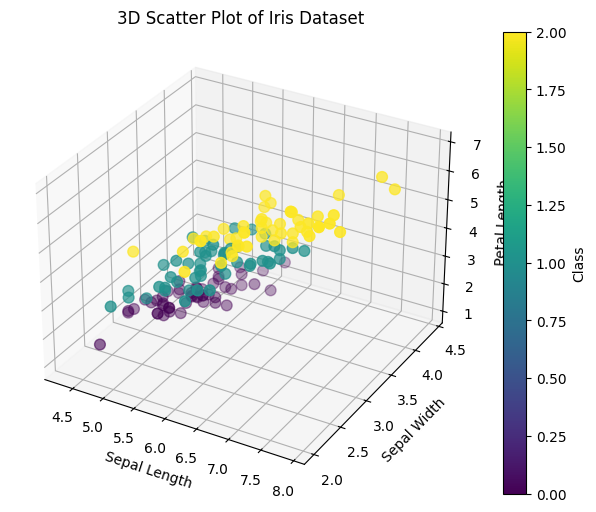

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=60)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
plt.colorbar(scatter, label='Class')
plt.show()
